In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
data = pd.read_csv('IMDb_All_Genres_etf_clean1.csv')

In [5]:
data

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


In [7]:
data.head()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"


In [8]:
data.tail()

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"
5561,Cumali Ceber: Allah Seni Alsin,2017,Gökhan Gök,"Halil Söyletmez, Doga Konakoglu, Emre Keskin, ...",1.0,100,Not Rated,Gross Unkown,Comedy,Comedy


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5562 entries, 0 to 5561
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    5562 non-null   object 
 1   Year           5562 non-null   int64  
 2   Director       5562 non-null   object 
 3   Actors         5562 non-null   object 
 4   Rating         5562 non-null   float64
 5   Runtime(Mins)  5562 non-null   int64  
 6   Censor         5562 non-null   object 
 7   Total_Gross    5562 non-null   object 
 8   main_genre     5562 non-null   object 
 9   side_genre     5562 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 434.7+ KB


In [10]:
data.describe()

,Year,Rating,Runtime(Mins)
count,5562.000000,5562.000000,5562.000000
mean,2002.792521,6.755861,112.226717
std,16.143990,0.937133,21.612655
min,1920.000000,1.000000,45.000000
25%,1997.000000,6.200000,97.000000
50%,2007.000000,6.800000,108.000000
75%,2014.000000,7.400000,123.000000
max,2022.000000,9.300000,321.000000


In [11]:
X = data['Movie_Title'] + ' ' + data['main_genre']
y = data['side_genre']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
vectorizer = TfidfVectorizer(max_features=500)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [19]:
svm_model = SVC(kernel='linear')

In [20]:
svm_model.fit(X_train_vec, y_train)

SVC(kernel='linear')

In [21]:
y_pred = svm_model.predict(X_test_vec)

In [22]:
y_pred

array([' Crime,  Drama', ' Drama,  Mystery', 'Drama', ...,
       ' Drama,  Romance', ' Drama,  History', ' Drama,  Romance'],
      dtype=object)

In [23]:
accuracy = accuracy_score(y_test, y_pred)

In [24]:
print("Accuracy:", accuracy)

Accuracy: 0.24977538185085355


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Rating'}>],
       [<Axes: title={'center': 'Runtime(Mins)'}>, <Axes: >]],
      dtype=object)

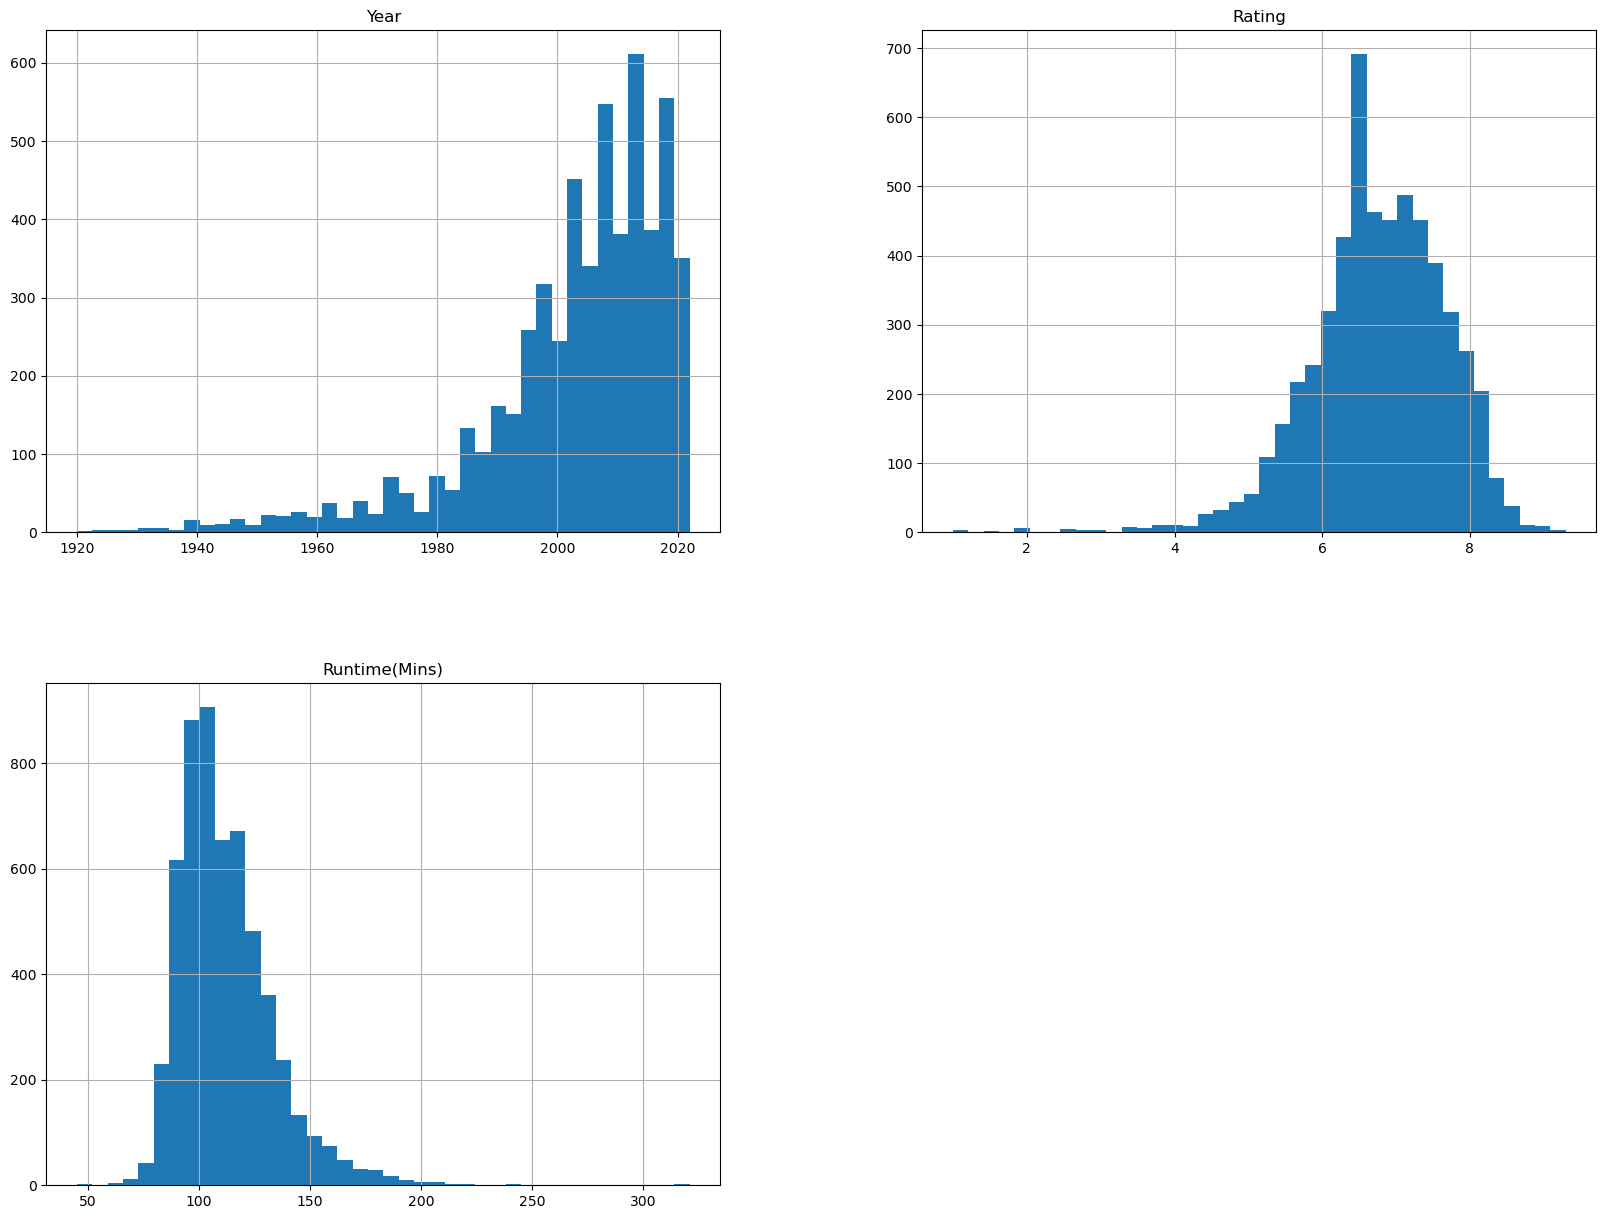

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=40,figsize=(20,15))

In [43]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0  0]]


array([[<Axes: xlabel='Year', ylabel='Year'>]], dtype=object)

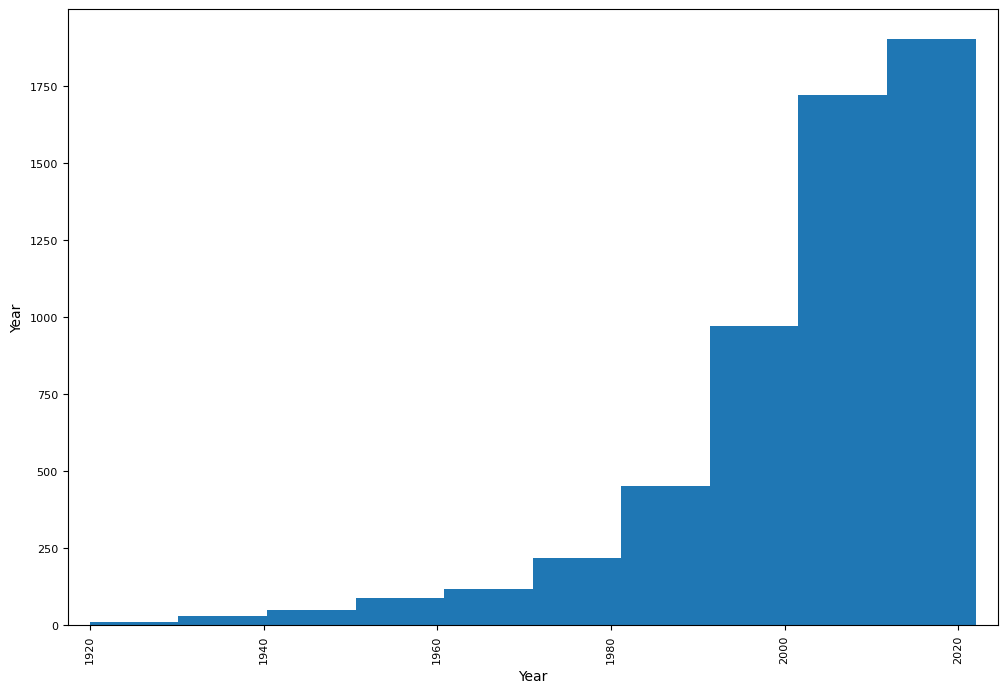

In [52]:
from pandas.plotting import scatter_matrix
attributes=["main_genre","Year"]
scatter_matrix(data[attributes],figsize=(12,8))

<Axes: xlabel='main_genre', ylabel='Year'>

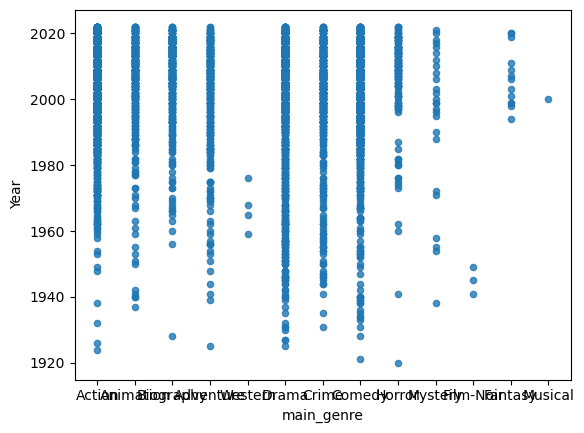

In [53]:
data.plot(kind="scatter",x="main_genre",y="Year",alpha=0.8)